<a href="https://colab.research.google.com/github/salmanromeo/ECEN_5513_Stochastic_Systems/blob/main/PSD_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**10.34**

#####**(a)** Create a random process $X[n]$ where each sample of the random process is an IID, Bernoulli random variable equally likely to be $±1$. Form a new process according to the AR(2) model $Y[n]=(1/2)Y[n-1]-(1/4)Y[n-2]+X[n]$. Assume for $Y[n]=0$ for $n<0$.

In [173]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the periodogram
def periodogram(x, dx):
    Nx = len(x)
    Rhat = np.convolve(x, np.flipud(x)) / Nx
    Nr = len(Rhat)
    Shat = np.fft.fft(Rhat)
    Shat = np.fft.fftshift(dx * np.abs(Shat))
    Nf = (Nr - 1) // 2
    df = 1 / (dx * Nr)
    f = np.arange(-Nf, Nf + 1) * df
    return Shat, f

# Set parameters
dt = 0.1
no_real = 50
Y_stacked = []

# a
for current_no_real in range(1, no_real + 1):
    N = 100
    p = 0.5
    X = np.random.binomial(1, p, N)

    X[X == 0] = -1

    Y = np.zeros(N)
    for n in range(N):
        if n == 0:
            Y[n] = X[n]
        elif n == 1:
            Y[n] = 0.5 * Y[n - 1] + X[n]
        else:
            Y[n] = 0.5 * Y[n - 1] - 0.25 * Y[n - 2] + X[n]

    Y_stacked.append(Y)

Y_stacked = np.array(Y_stacked)

# Display Y_stacked
print(Y_stacked)

[[ 1.          1.5        -0.5        ... -1.30406692  0.70963552
   1.68083449]
 [-1.          0.5         1.5        ... -0.42664458  0.42903021
  -0.67882375]
 [-1.          0.5         1.5        ... -1.70988212 -1.43077299
  -1.28791596]
 ...
 [ 1.         -0.5         0.5        ...  1.30388478  1.31773922
  -0.66710159]
 [ 1.         -0.5        -1.5        ...  1.32310377 -0.69273867
   0.32285472]
 [-1.         -1.5         0.5        ... -0.55164984 -1.41080734
   0.43250879]]


#####**(b)** Compute the time-average autocorrelation function $<Y[n]Y[n+k]>$ from a single realization of this process.

In [174]:
# b
which_no_real = 0  # Adjusted index
Ryy = [Y_stacked[which_no_real, i] * Y_stacked[which_no_real, i + 1] for i in range(N - 1)]
Ryy_temporal_avg = np.sum(Ryy) / (N - 1)
print(Ryy_temporal_avg)

0.5884223254618242


#####**(c)** Compute the ensemble average autocorrelation function $E[Y[n]Y[n+k]]$ from several realizations of this process. Does the process appear to be ergodic in the autocorrelation?

In [175]:
# c
Ryy_stacked = np.array([Y_stacked[i, :-1] * Y_stacked[i, 1:] for i in range(no_real)])
ensamble_avg_Ryy = np.sum(Ryy_stacked, axis=0) / no_real
print(ensamble_avg_Ryy)

[0.42       0.7        0.39       0.4878125  0.4446875  0.83171875
 0.56215332 0.29272949 0.45803467 0.31845161 0.53262077 0.51720562
 0.43240745 0.58466986 0.48994352 0.4128254  0.42929019 0.58521472
 0.64360791 0.42887792 0.60039261 0.67905765 0.81437793 0.68202891
 0.56189651 0.55896256 0.42970496 0.24107371 0.58771269 0.8460046
 0.39728539 0.44642954 0.2304888  0.59244301 0.83236965 0.35911208
 0.44366952 0.52113978 0.53108183 0.25740377 0.28062726 0.30397131
 0.42785753 0.33592612 0.59392533 0.24266633 0.24253407 0.50634691
 0.66740748 0.94582397 0.79768232 0.29881272 0.22358994 0.25101579
 0.45928468 0.51160318 0.82168032 0.55037699 0.75381822 0.67829991
 0.32336701 0.36227302 0.47757975 0.37654856 0.62489816 0.37357815
 0.367915   0.36045574 0.3876797  0.62432557 0.57250486 0.31306236
 0.54559016 0.62527854 0.821897   0.565266   0.41201799 0.35987043
 0.21151684 0.4810576  0.41111551 0.33619826 0.22863139 0.2410218
 0.17517012 0.43342757 0.31156002 0.41175518 0.37862832 0.668246

#####**(d)** Estimate the PSD of this process using the periodogram method.

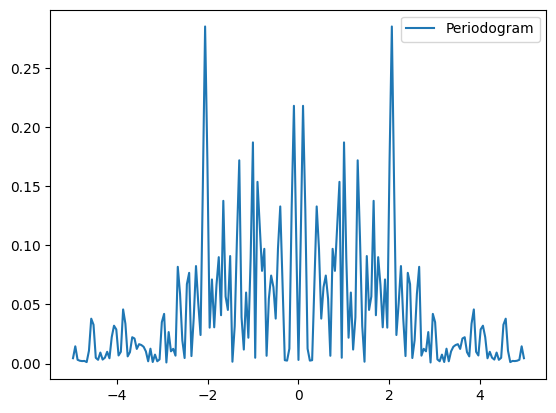

In [181]:
# d
S_hat_np, f = periodogram(Y_stacked[0, :], dt)
S_hat_np = S_hat_np / np.linalg.norm(S_hat_np)  # Normalizing

# Plot
plt.figure(1)
plt.plot(f, S_hat_np, label='Periodogram')
plt.legend()
plt.show()

**10.35**

#####**(a)** For the process in Exercise 10.34, find a parametric estimate of the PSD by using an AR(1) model. Compare the resulting PSD estimate with the non-parametric estimate found in Exercise 10.34(d). Explain any differences you see.

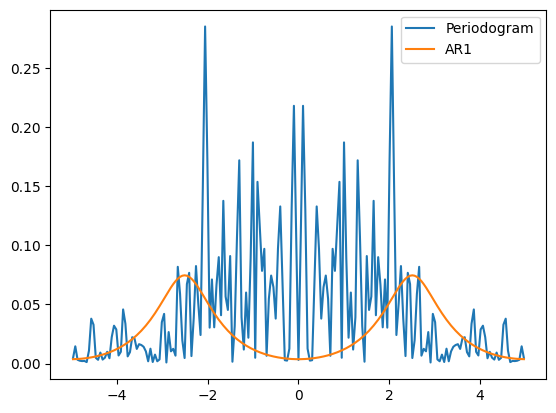

In [189]:
# a
Ryy_1_hat = Ryy_temporal_avg
Ryy_0_hat = np.sum(Y_stacked[0, :-1] ** 2) / N
a1 = Ryy_1_hat / Ryy_0_hat

var_x = p * (1 - p)

Ryy_from_AR1 = [(a1 ** i) * var_x / (1 - a1 ** 2) for i in range(N)]
S_hat_AR1 = np.fft.fft(Ryy_from_AR1)
S_hat_AR1 = np.fft.fftshift(dt * np.abs(S_hat_AR1))
S_hat_AR1 = np.concatenate((np.rot90([S_hat_AR1], 2)[0], S_hat_AR1[1:]))
S_hat_AR1 = S_hat_AR1 / np.linalg.norm(S_hat_AR1) - 0.04

# Display S_hat_AR1
plt.figure(2)
plt.plot(f, S_hat_np, label="Periodogram")
plt.plot(f, S_hat_AR1[:len(f)], label='AR1')
plt.legend()
plt.show()

#####**(b)** Again, referring to the process in Exercise 10.34, find a parametric estimate of the PSD this time using an AR(2) model. Compare the resulting PSD estimate with the non-parametric estimate found in Exercise 10.34(d). Explain any differences you see.

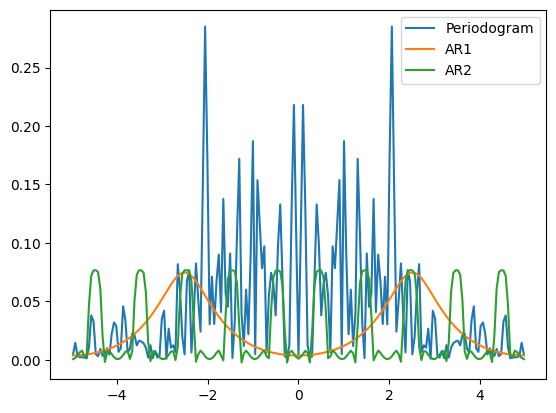

In [190]:
# b
a1_AR2 = 1 / 2
a2_AR2 = -1 / 4
discriminant = np.sqrt(complex(a1_AR2 ** 2 + 4 * a2_AR2))

b1 = (a1_AR2 + discriminant) / 2
b2 = (a1_AR2 - discriminant) / 2

k1 = (b2 * (1 - a2_AR2) - a1_AR2) / (dt * (b2 - b1))
k2 = var_x * (1 - a2_AR2) / dt - k1

S_hat_AR2 = [(k1 * (1 - b1 ** 2)) / (1 + b1 ** 2 - 2 * b1 * np.cos(2 * np.pi * f[i])) +
            (k2 * (1 - b2 ** 2)) / (1 + b2 ** 2 - 2 * b2 * np.cos(2 * np.pi * f[i])) for i in range(N)]
S_hat_AR2 = np.fft.fftshift(dt * np.abs(S_hat_AR2))
S_hat_AR2 = np.concatenate((np.rot90([S_hat_AR2], 2)[0], S_hat_AR2[1:]))
S_hat_AR2 = S_hat_AR2 / np.linalg.norm(S_hat_AR2) - 0.04

# Display S_hat_AR2
plt.figure(3)
plt.plot(f, S_hat_np, label="Periodogram")
plt.plot(f, S_hat_AR1[:len(f)], label='AR1')
plt.plot(f, S_hat_AR2[:len(f)], label='AR2')
plt.legend()
plt.show()

#####**The periodogram method, being a non-parametric estimation technique, tends to provide a relatively poor estimate of autocorrelation, leading to suboptimal PSD estimation.**
#####**In contrast, the Autoregressive model of order 1 (AR(1)) is a parametric estimation approach known for its improved performance compared to non-parametric methods. The AR(1) model yields a smoother PSD in comparison to the periodogram method.**
#####**For more complexity and enhanced modeling capability, the Autoregressive model of order 2 (AR(2)) can provide even better PSD estimation. However, the increased complexity of AR(2) may sometimes lead to overfitting issues.**